In [5]:
import glob
import pandas as pd

# standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# displays logos inline within the notebook;
# remove if using a python interpreter instead
%matplotlib inline

# logomaker import
import logomaker

%load_ext lab_black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [46]:
import numpy as np

In [3]:
nest = [
    [
        "B_cell--hocomoco__IRF4_HUMAN.H11MO.0.A",
        "B_cell--taipale__PAX2_DBD_NGTCACGCWTSRNTGNNY",
    ],
    [
        "CD14+_monocyte--hocomoco__CEBPA_MOUSE.H11MO.0.A",
        "CD14+_monocyte--taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL",
    ],
    [
        "CD16+_monocyte--taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL",
        "CD16+_monocyte--dbcorrdb__CEBPB__ENCSR000EDA_1__m1",
    ],
    [
        "CD4+_T_cell--tfdimers__MD00005",
        "CD4+_T_cell--taipale_cyt_meth__ERG_NACMGGAARTN_FL_meth",
    ],
    ["Cytotoxic_T_cell--cisbp__M5895"],
    ["Dendritic_cell--taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL"],
    ["Natural_killer_cell--cisbp__M1631"],
]

In [4]:
" ".join(['"' + x.split("--")[-1] + '"' for x in list(set(sum(nest, [])))])

'"taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL" "dbcorrdb__CEBPB__ENCSR000EDA_1__m1" "cisbp__M5895" "taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL" "hocomoco__CEBPA_MOUSE.H11MO.0.A" "tfdimers__MD00005" "hocomoco__IRF4_HUMAN.H11MO.0.A" "taipale__PAX2_DBD_NGTCACGCWTSRNTGNNY" "taipale_cyt_meth__ERG_NACMGGAARTN_FL_meth" "taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL" "cisbp__M1631"'

In [5]:
## convert motif names to script using bash script in previous notebook

['motif_pwms/hocomoco__CEBPA_MOUSE.H11MO.0.A.txt',
 'motif_pwms/cisbp__M1631.txt',
 'motif_pwms/taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL.txt',
 'motif_pwms/taipale__PAX2_DBD_NGTCACGCWTSRNTGNNY.txt',
 'motif_pwms/dbcorrdb__CEBPB__ENCSR000EDA_1__m1.txt',
 'motif_pwms/cisbp__M5895.txt',
 'motif_pwms/tfdimers__MD00005.txt',
 'motif_pwms/hocomoco__IRF4_HUMAN.H11MO.0.A.txt',
 'motif_pwms/taipale_cyt_meth__ERG_NACMGGAARTN_FL_meth.txt']

In [116]:
motif_alias_dict = {
    "hocomoco__IRF4_HUMAN.H11MO.0.A": "SPIB/IRF",
    "taipale__PAX2_DBD_NGTCACGCWTSRNTGNNY": "PAX2",
    "cisbp__M5063": "E-Box",
    "dbcorrdb__RELA__ENCSR000EBA_1__m2": "RELA",
    "hocomoco__CEBPA_MOUSE.H11MO.0.A": "CEBPA/B",
    "taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL": "SPIB/IRF",
    "dbcorrdb__CEBPB__ENCSR000EDA_1__m1": "CEBPA/B",
    "tfdimers__MD00005": "RUNX/TCF7",
    "taipale_cyt_meth__ERG_NACMGGAARTN_FL_meth": "ERG",
    "cisbp__M5895": "TBX20",
    "dbcorrdb__STAT3__ENCSR000DZV_1__m1": "STAT3",
    "cisbp__M1631": "TBX20",
    "cisbp__M4486": "POU2F1/2",
    "tfdimers__MD00026": "SPIB/IRF",
}

# create logos from all these

In [117]:
pwm_paths = glob.glob("motif_pwms/*")

hocomoco__CEBPA_MOUSE.H11MO.0.A
CEBPA/B
cisbp__M1631
TBX20
taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL
SPIB/IRF
taipale__PAX2_DBD_NGTCACGCWTSRNTGNNY
PAX2
dbcorrdb__CEBPB__ENCSR000EDA_1__m1
CEBPA/B
cisbp__M5895
TBX20
tfdimers__MD00026
SPIB/IRF
tfdimers__MD00005
RUNX/TCF7
cisbp__M4486
POU2F1/2
hocomoco__IRF4_HUMAN.H11MO.0.A
SPIB/IRF
taipale_cyt_meth__ERG_NACMGGAARTN_FL_meth
ERG


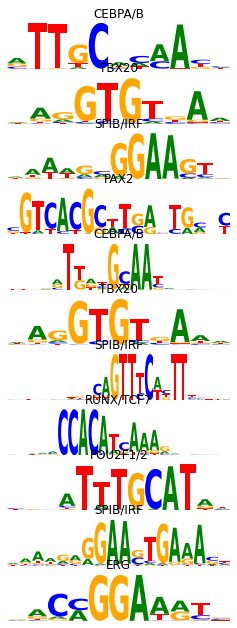

In [118]:
fig, axes = plt.subplots(len(pwm_paths), figsize=(4, len(pwm_paths)))
for pwm_path in pwm_paths:
    ax = axes[pwm_paths.index(pwm_path)]
    logo_name = pwm_path.split("/")[-1].split(".txt")[0]
    print(logo_name)
    alias = motif_alias_dict[logo_name]
    print(alias)
    df = pd.read_csv(pwm_path, sep="\t", header=None)
    df.columns = ["A", "C", "G", "T"]
    uncertainty = -(df * (np.log2(df))).sum(axis=1)
    total_information_content = np.log2(4) - uncertainty
    df_information_content = df.multiply(total_information_content, axis=0)
    logo = logomaker.Logo(df_information_content, ax=ax)
    logo.style_spines(visible=False)
    logo.ax.set_xticks([])
    logo.ax.set_yticks([])
    # logo.ax.set_ylabel(pwm_path, labelpad=-1, rotation=0)
    logo.ax.set_title(alias, rotation=0)
    logo.ax.set_facecolor("white")

plt.savefig(f"logos/logos_merged.png", dpi=300, facecolor="white")
plt.savefig(f"logos/logos_merged.svg", dpi=300, facecolor=None)

plt.show()

Text(0, 0.5, '                 saliency')

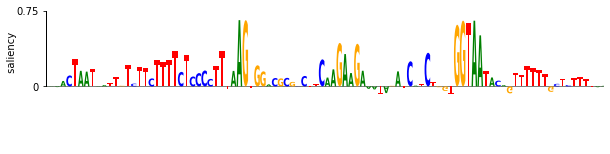

In [102]:
# load saliency matrix
nn_df = logomaker.get_example_matrix("nn_saliency_matrix", print_description=False)

# create Logo object
nn_logo = logomaker.Logo(nn_df)

# style using Logo methods
nn_logo.style_spines(visible=False)
nn_logo.style_spines(spines=["left"], visible=True, bounds=[0, 0.75])

# style using Axes methods
nn_logo.ax.set_xlim([20, 115])
nn_logo.ax.set_xticks([])
nn_logo.ax.set_ylim([-0.6, 0.75])
nn_logo.ax.set_yticks([0, 0.75])
nn_logo.ax.set_yticklabels(["0", "0.75"])
nn_logo.ax.set_ylabel("                 saliency", labelpad=-1)

In [ ]:
# set parameters for drawing gene
exon_start = 55 - 0.5
exon_stop = 90 + 0.5
y = -0.2
xs = np.arange(-3, len(nn_df), 10)
ys = y * np.ones(len(xs))

# draw gene
nn_logo.ax.axhline(y, color="k", linewidth=1)
nn_logo.ax.plot(xs, ys, marker="4", linewidth=0, markersize=7, color="k")
nn_logo.ax.plot(
    [exon_start, exon_stop], [y, y], color="k", linewidth=10, solid_capstyle="butt"
)

# annotate gene
nn_logo.ax.plot(exon_start, 1.8 * y, "^k", markersize=15)
nn_logo.ax.text(20, 2 * y, "$U2SURP$", fontsize=12)
nn_logo.ax.text(
    exon_start,
    2.5 * y,
    "chr3:142,740,192",
    verticalalignment="top",
    horizontalalignment="center",
)